# 1. Libraries, Prerequisite and Packages

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# 2. Import Data

In [8]:
df = pd.read_csv('stroke.csv')
df.head()

gender  age  hypertension  heart_disease  ever_married  work_type  \
0       2   31             0              0             2          4   
1       2   13             0              0             2          1   
2       1   18             0              0             2          2   
3       2   65             0              0             1          2   
4       1    4             0              0             2          1   

   Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0               1              70.66  27.2               4       0  
1               1              85.81  18.6               2       0  
2               2              60.56  33.0               4       0  
3               2             205.77  46.0               3       1  
4               1              90.42  16.2               2       0

In [9]:
df = df.drop('stroke', axis=1)

# 3. Exploratory Data Analysis

In [10]:
df.isnull().sum()

gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                  52
smoking_status        0
dtype: int64

## Data Cleaning

In [11]:
df['bmi'] = df['bmi'].fillna(np.mean(df['bmi']))
df['age'] = df['age'].replace('*82', 82)
df['age'] = df['age'].astype('int64')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1136 entries, 0 to 1135
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             1136 non-null   int64  
 1   age                1136 non-null   int64  
 2   hypertension       1136 non-null   int64  
 3   heart_disease      1136 non-null   int64  
 4   ever_married       1136 non-null   int64  
 5   work_type          1136 non-null   int64  
 6   Residence_type     1136 non-null   int64  
 7   avg_glucose_level  1136 non-null   float64
 8   bmi                1136 non-null   float64
 9   smoking_status     1136 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 88.9 KB


## Distribution of Data

In [13]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

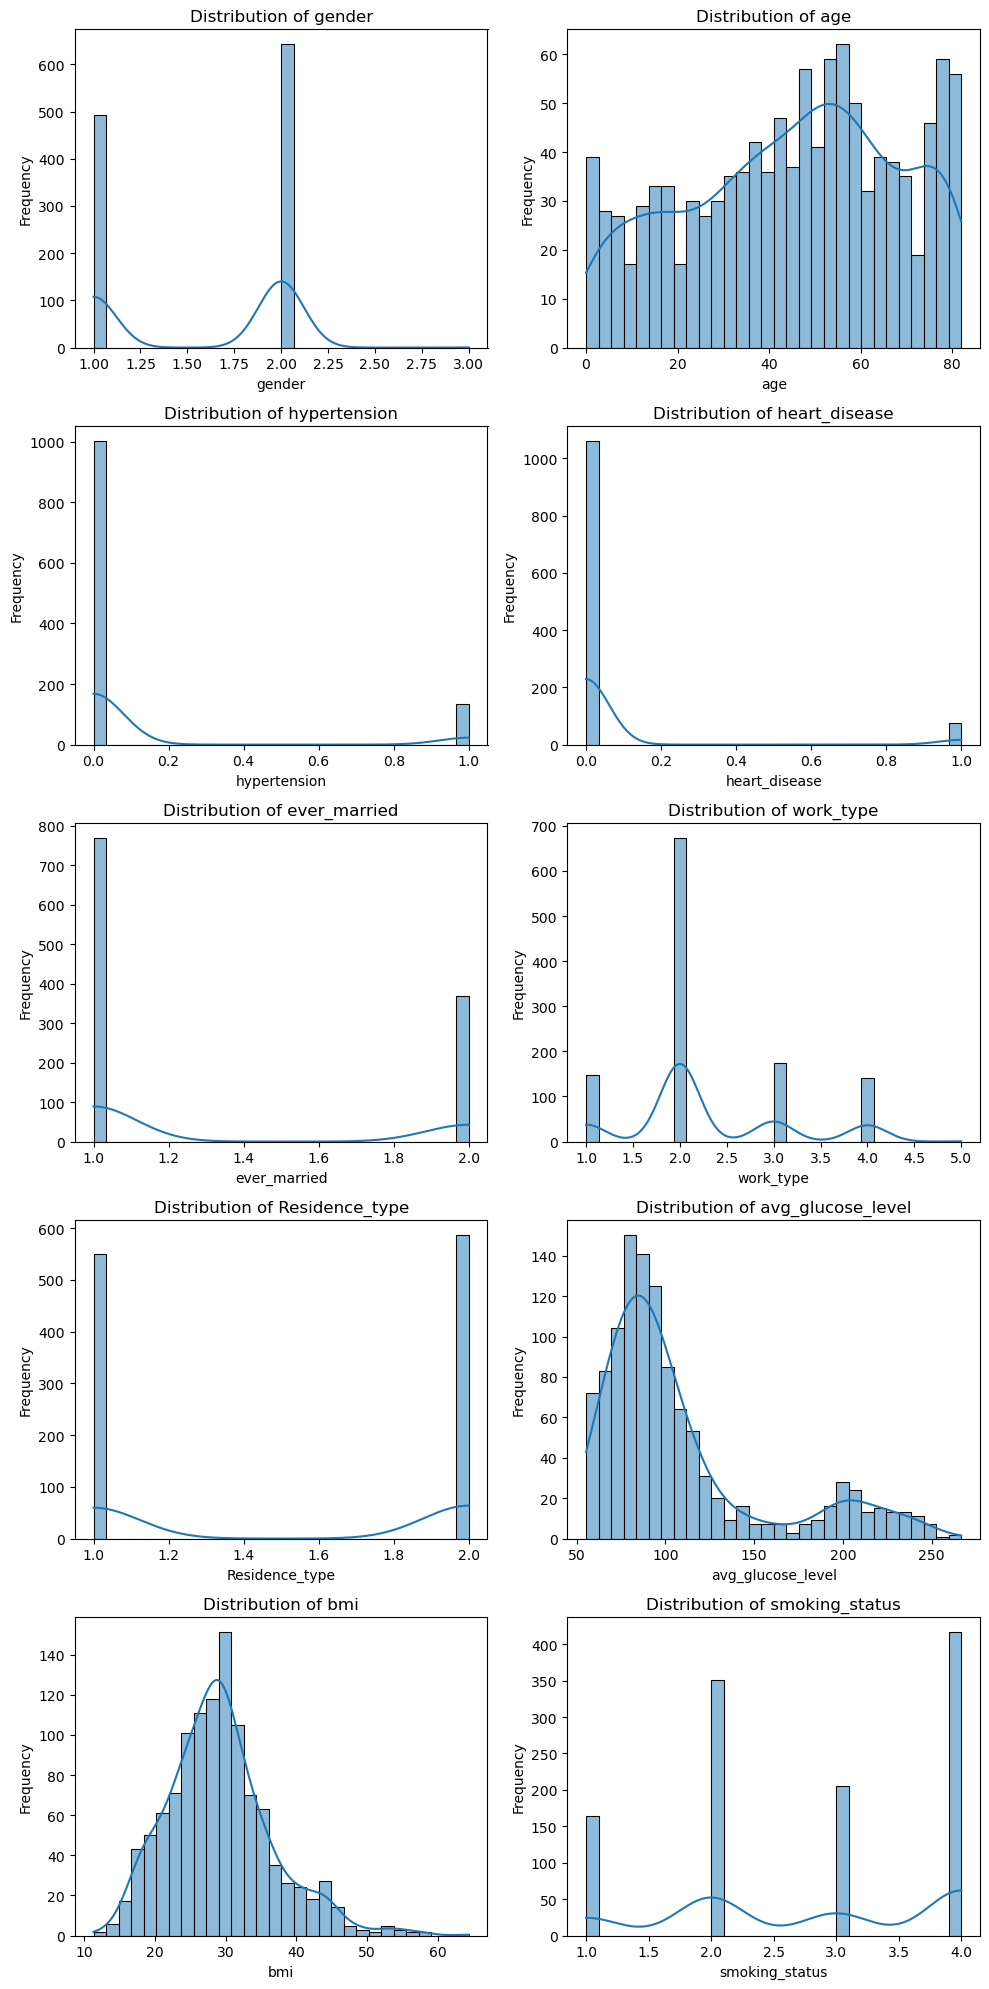

In [15]:
columns_to_plot  = ['gender',
                    'age',
                    'hypertension',
                    'heart_disease',
                    'ever_married',
                    'work_type',
                    'Residence_type',
                    'avg_glucose_level',
                    'bmi',
                    'smoking_status']

num_columns = 2
num_rows = 5

plt.figure(figsize=(10, 20))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(num_rows, 2, i)  # Create subplots in a grid with 5 columns
    sns.histplot(data=df, x=column, bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
# Adjust the layout to prevent overlap
plt.tight_layout()

# Show all the subplots
plt.show()

<Figure size 4000x4000 with 0 Axes>

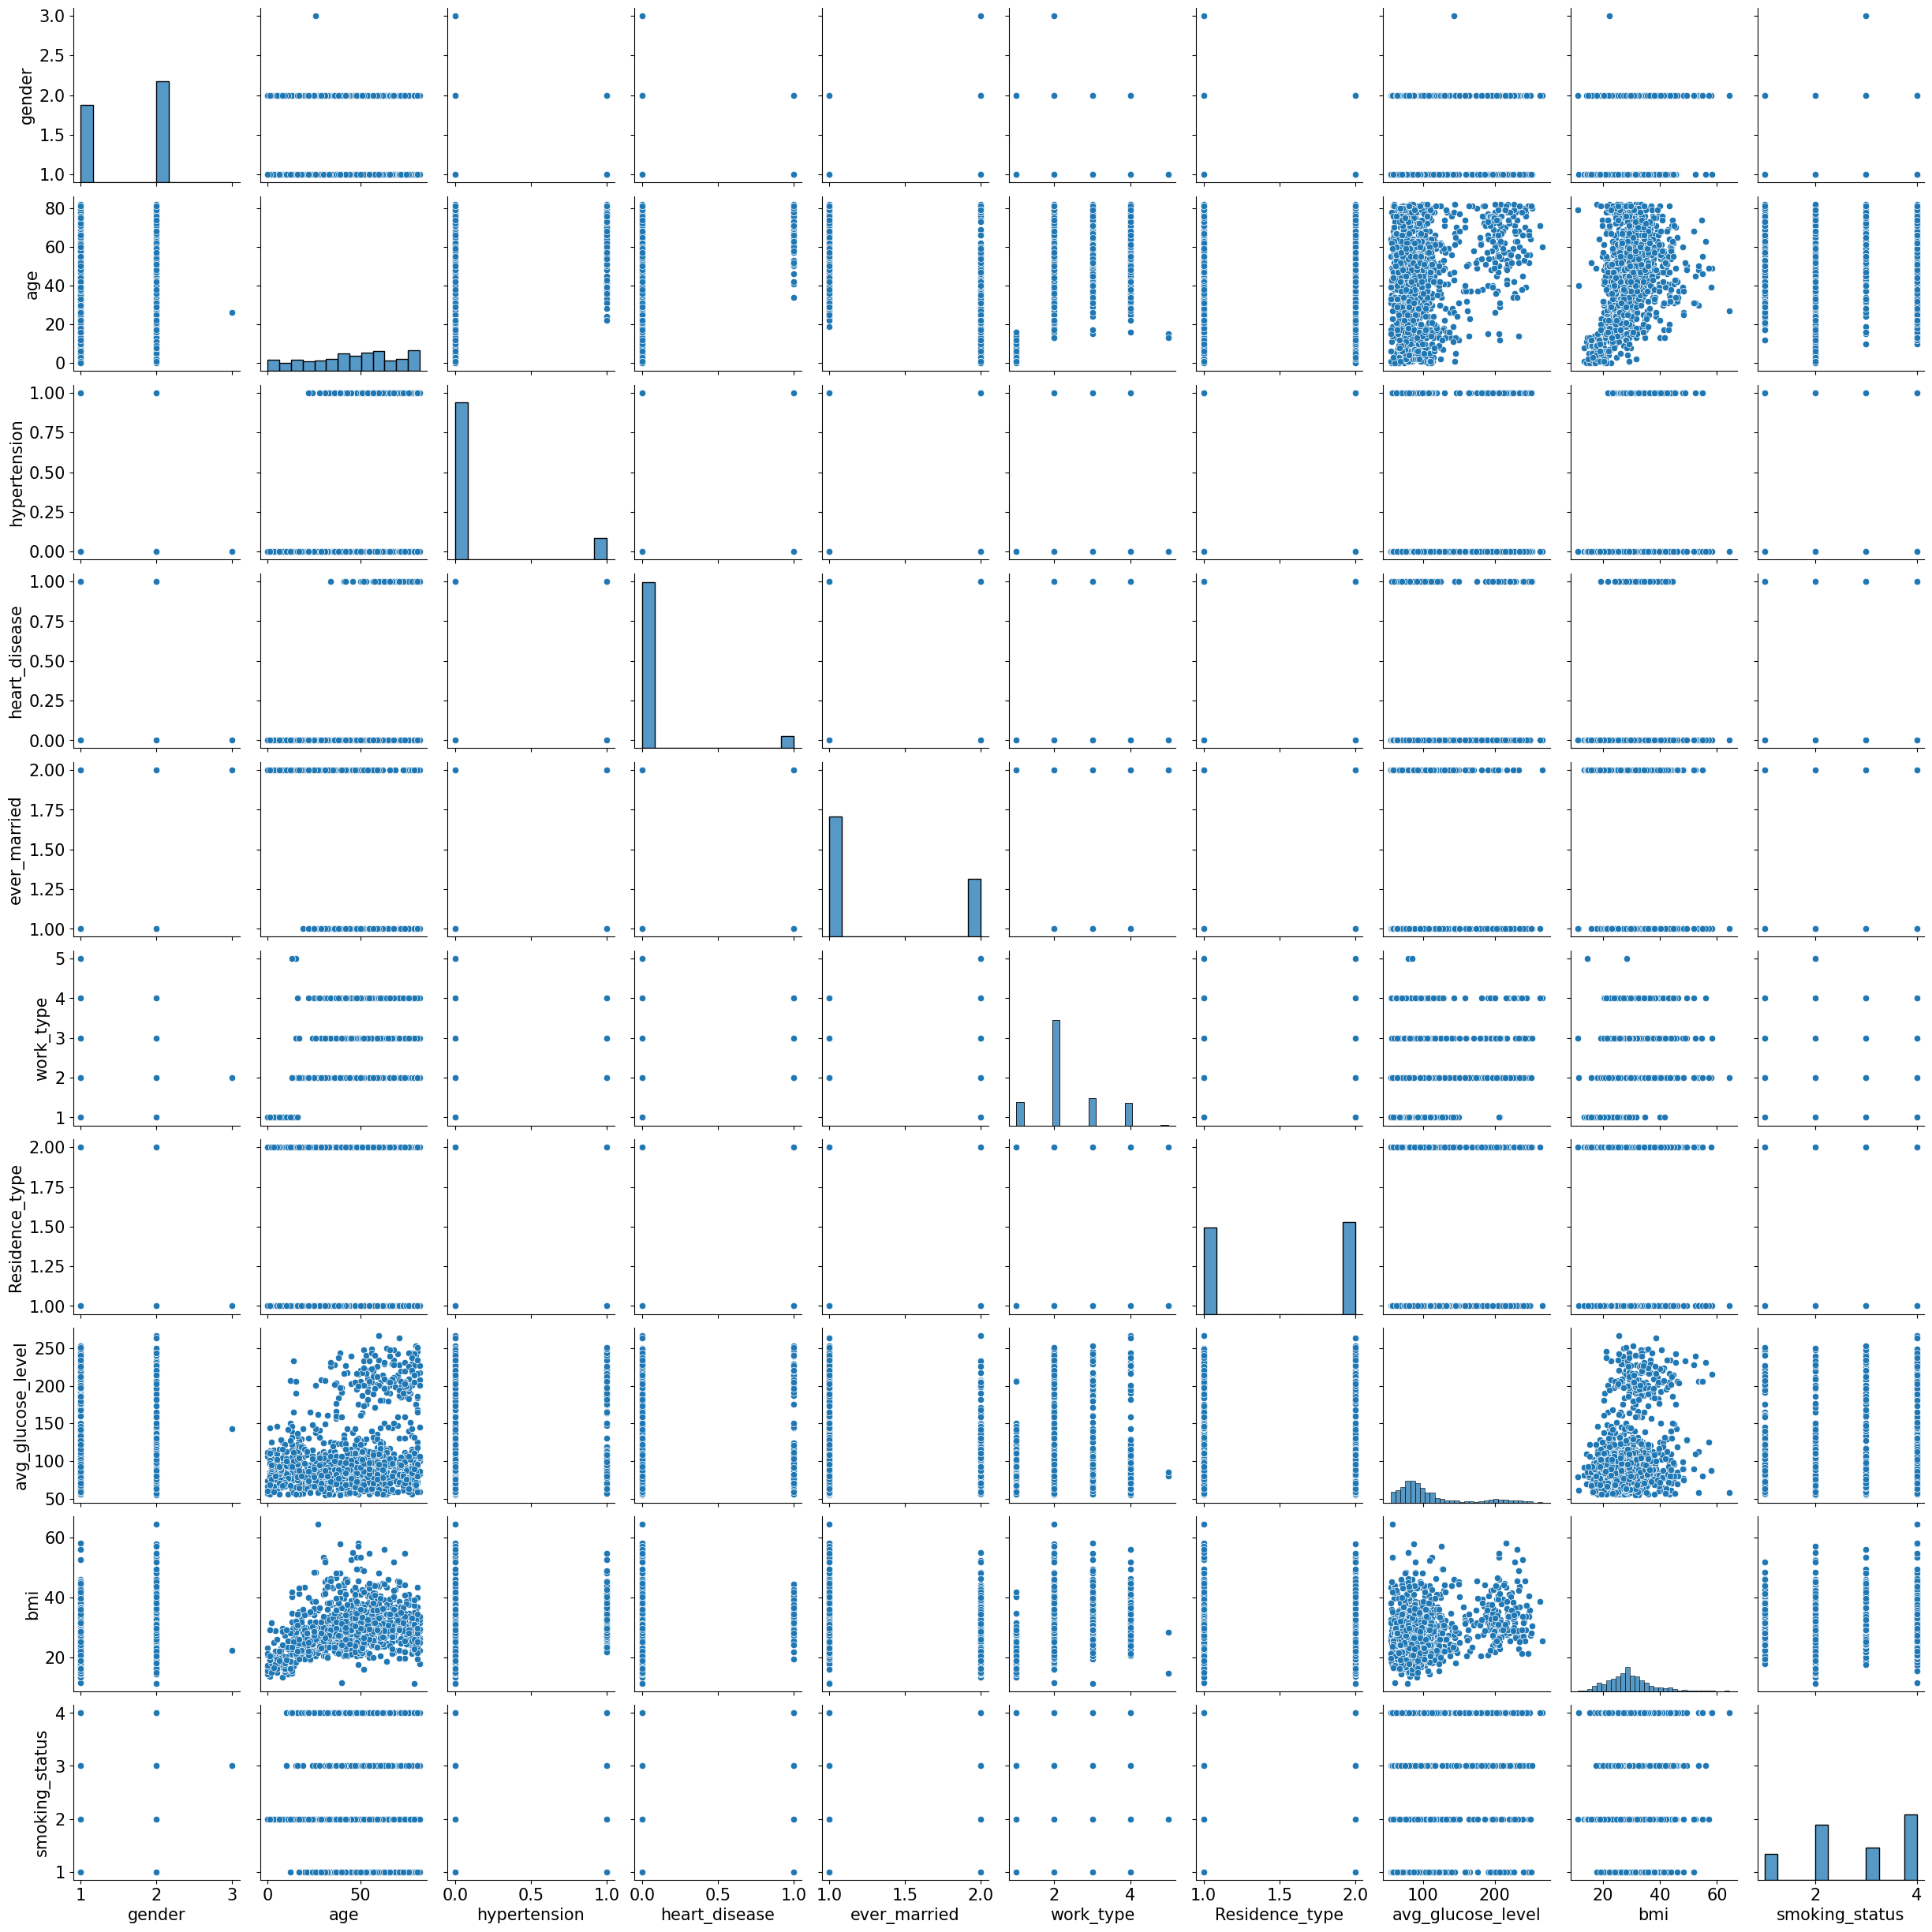

In [20]:
# Set the figure size
plt.figure(figsize=(40, 40))

plt.rcParams.update({'font.size': 15})
sns.pairplot(df)

# Show the plot
plt.show()

# 4. Model Development

**Determine the number of clusters**

D:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

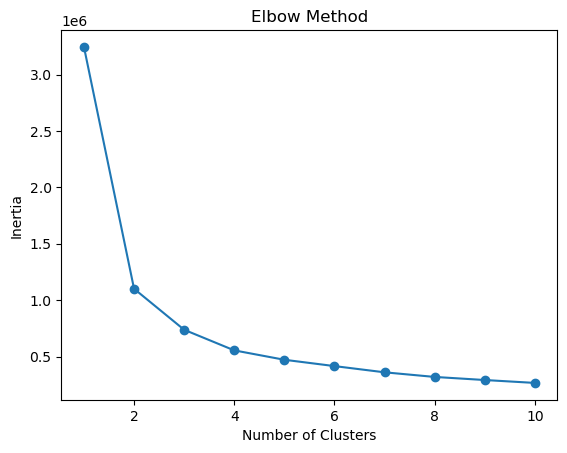

In [19]:
inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df)
    inertias.append(kmeans.inertia_) #main function to determine the clusters i "inertia"

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

Looks like, 2 clusters is the best number according to elbow method.

**K-Means Clustering**

In [21]:
# Fit K-Means to the data with K=2
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(df)

# Add the cluster labels to the DataFrame
df['Cluster'] = kmeans.labels_

# Create separate dataframes for each cluster
cluster_dataframes = [df[df['Cluster'] == i] for i in range(5)]

In [22]:
df.head()

gender  age  hypertension  heart_disease  ever_married  work_type  \
0       2   31             0              0             2          4   
1       2   13             0              0             2          1   
2       1   18             0              0             2          2   
3       2   65             0              0             1          2   
4       1    4             0              0             2          1   

   Residence_type  avg_glucose_level   bmi  smoking_status  Cluster  
0               1              70.66  27.2               4        0  
1               1              85.81  18.6               2        0  
2               2              60.56  33.0               4        0  
3               2             205.77  46.0               3        1  
4               1              90.42  16.2               2        0

In [23]:
df.to_csv('stroke_cluster_data.csv')

# 5. Cluster Analysis

In [25]:
data = pd.read_csv('stroke_cluster_data.csv')
data = data.drop('Unnamed: 0', axis=1)
data.head()

gender  age  hypertension  heart_disease  ever_married  work_type  \
0       2   31             0              0             2          4   
1       2   13             0              0             2          1   
2       1   18             0              0             2          2   
3       2   65             0              0             1          2   
4       1    4             0              0             2          1   

   Residence_type  avg_glucose_level   bmi  smoking_status  Cluster  
0               1              70.66  27.2               4        0  
1               1              85.81  18.6               2        0  
2               2              60.56  33.0               4        0  
3               2             205.77  46.0               3        1  
4               1              90.42  16.2               2        0

In [26]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'Cluster'],
      dtype='object')

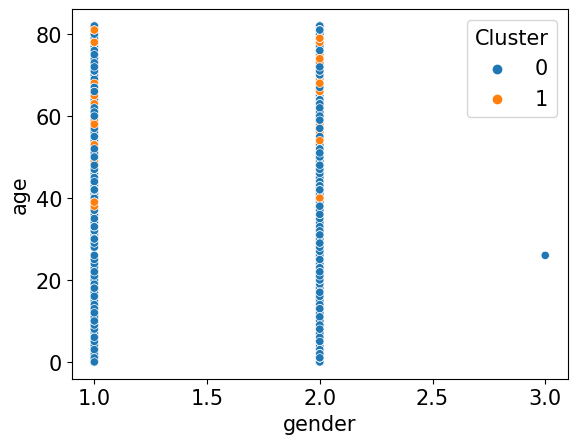

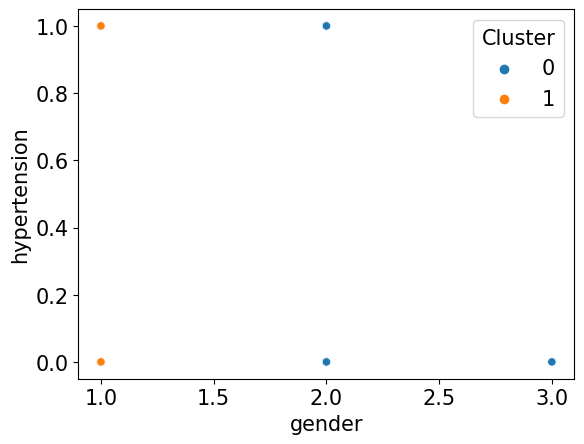

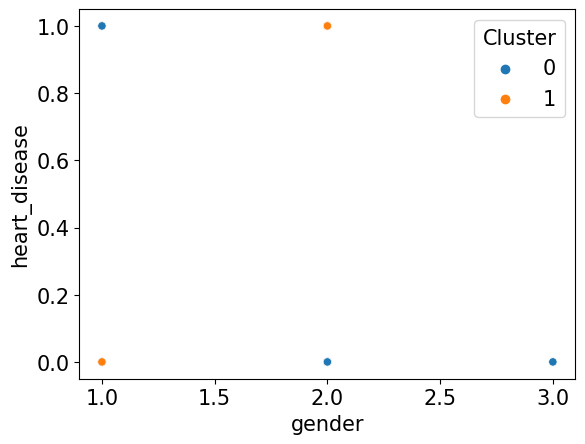

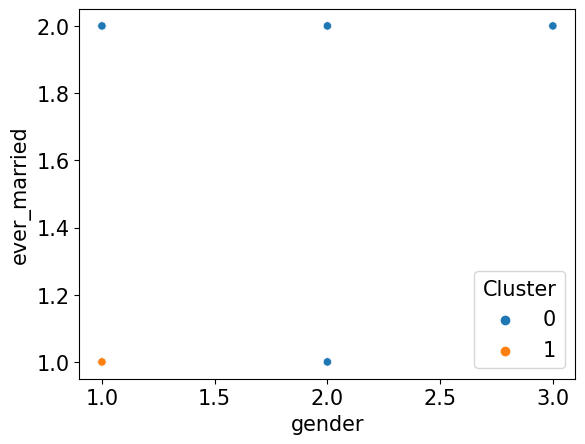

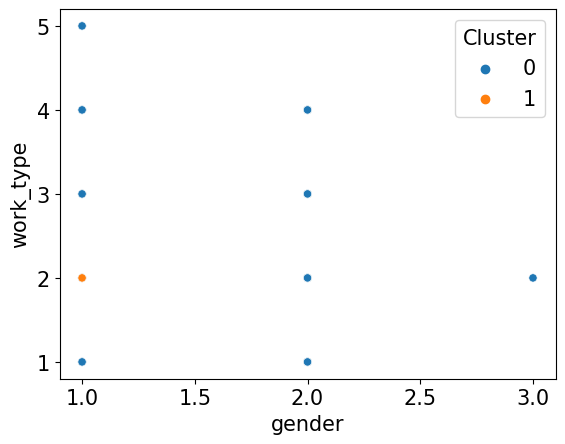

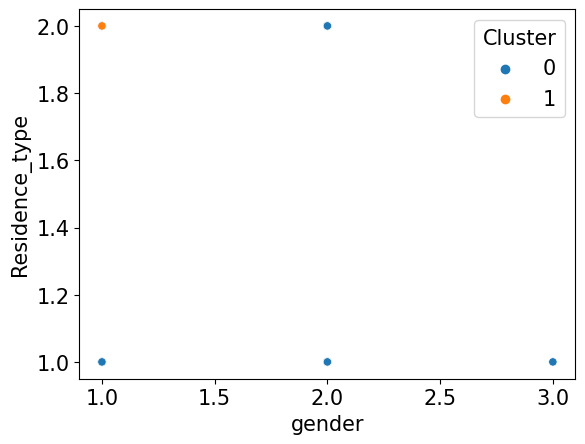

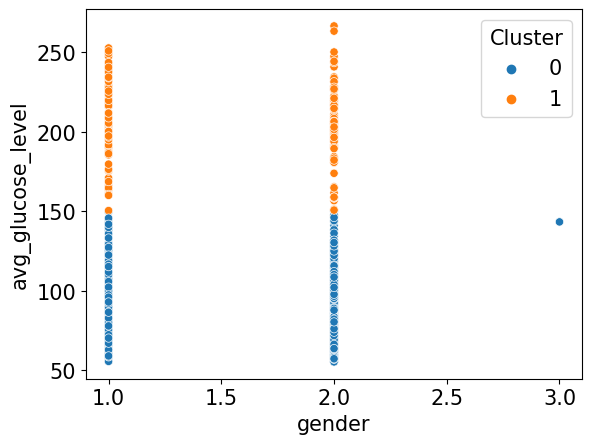

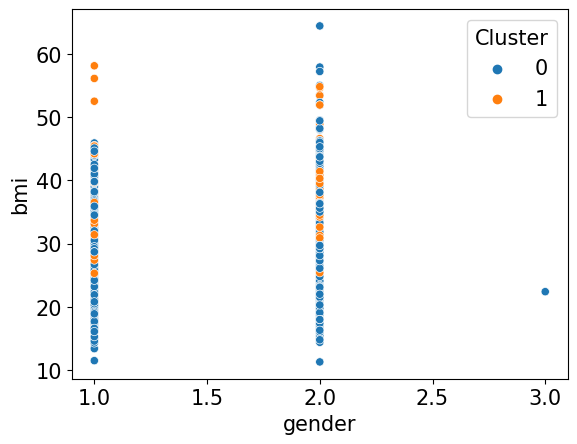

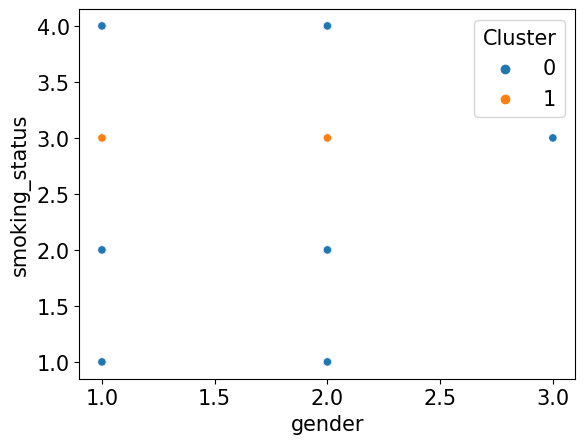

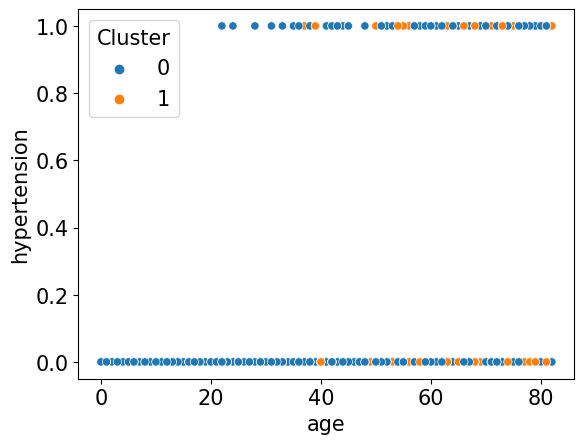

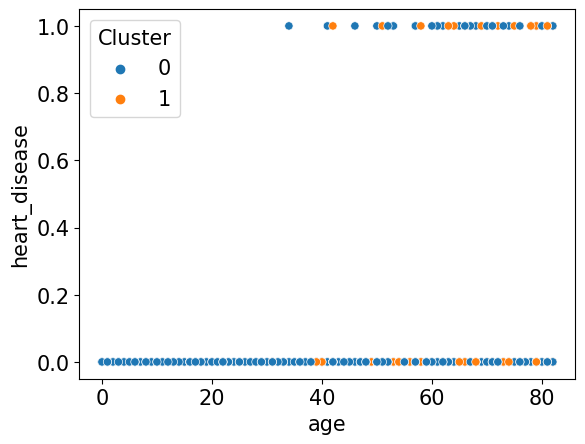

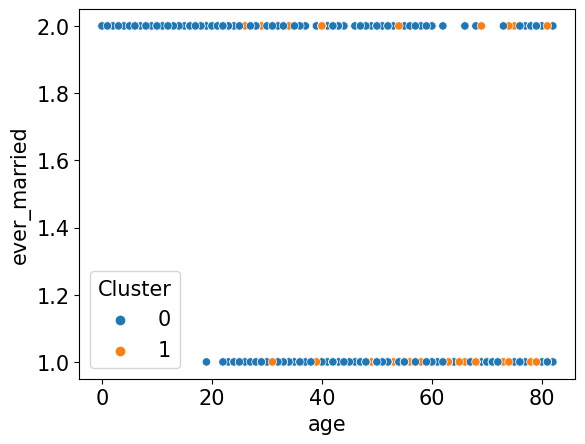

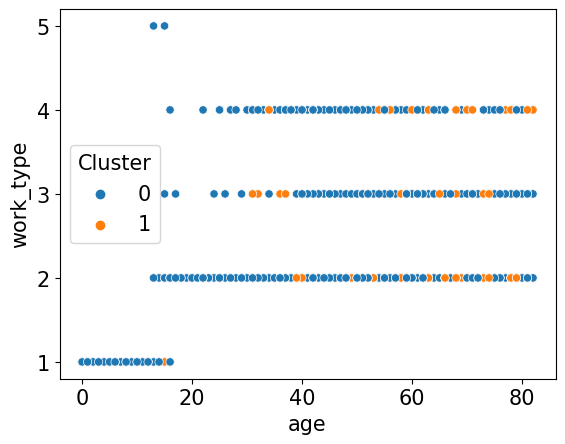

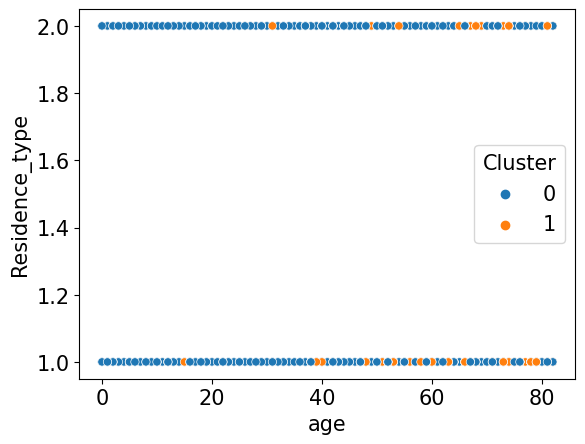

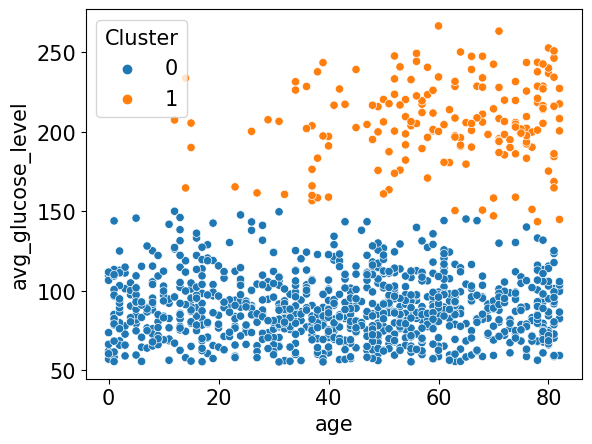

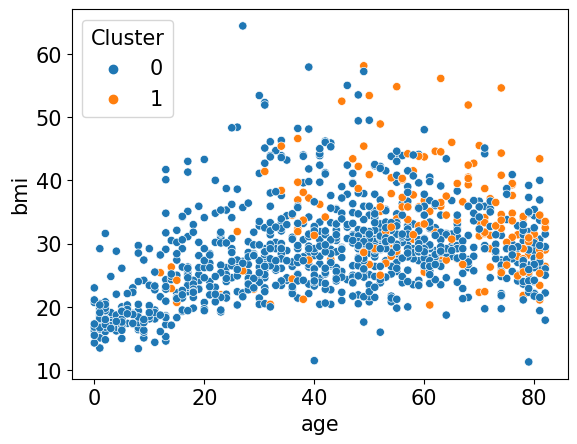

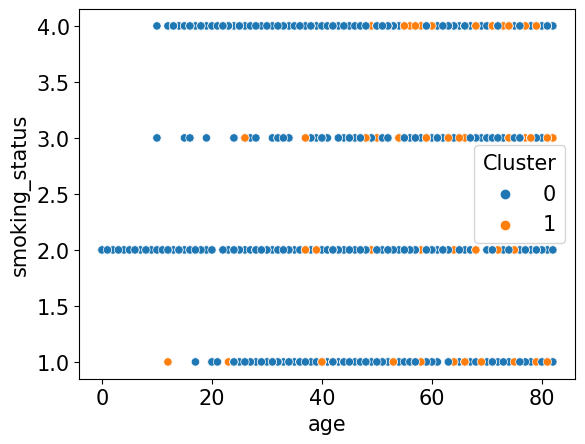

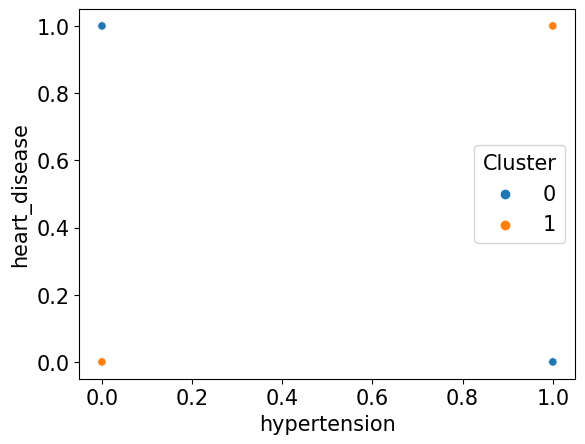

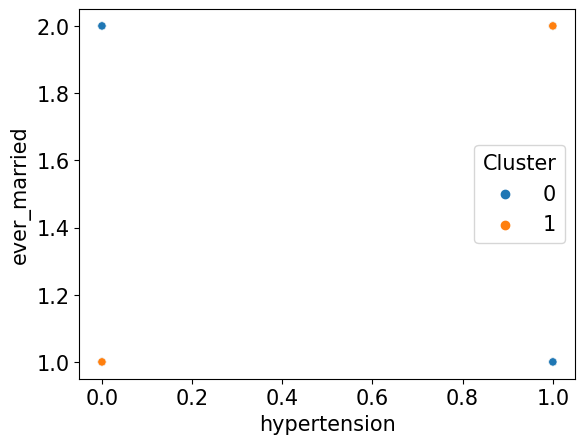

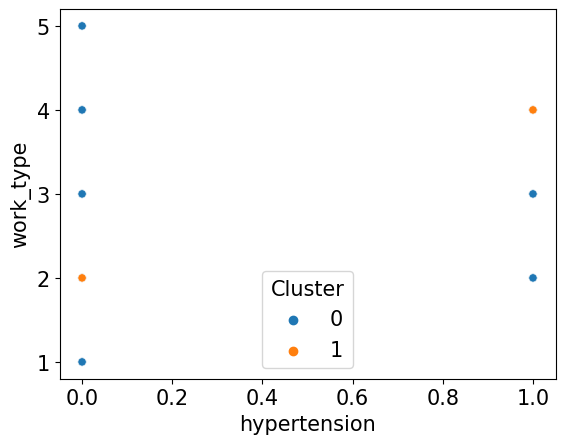

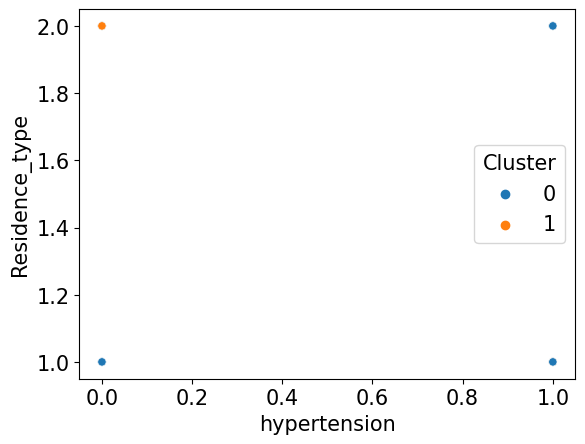

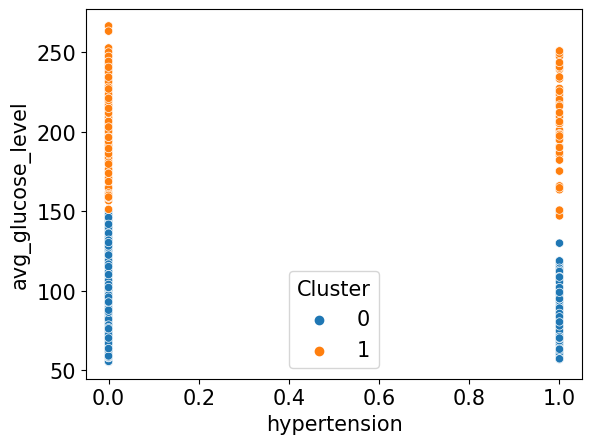

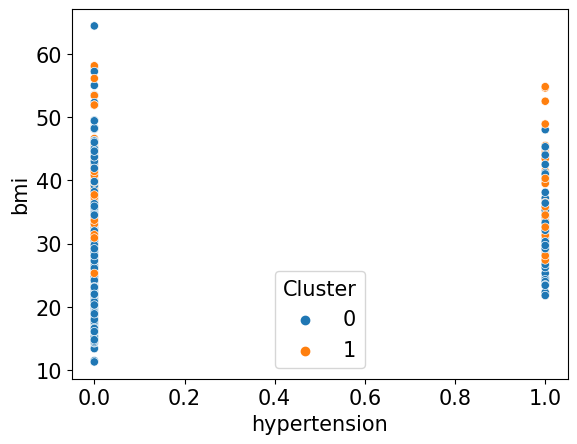

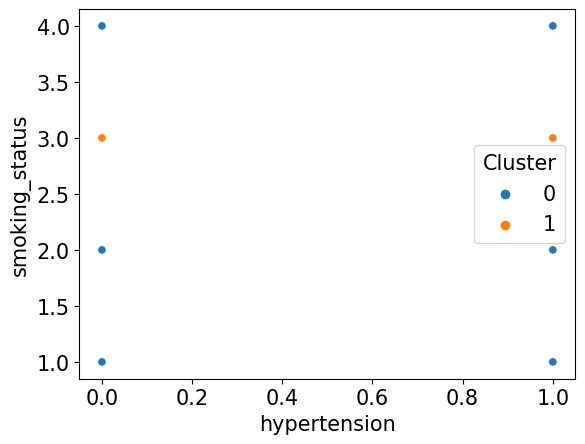

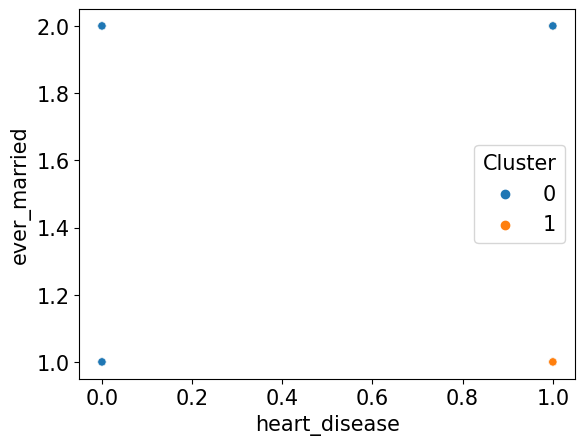

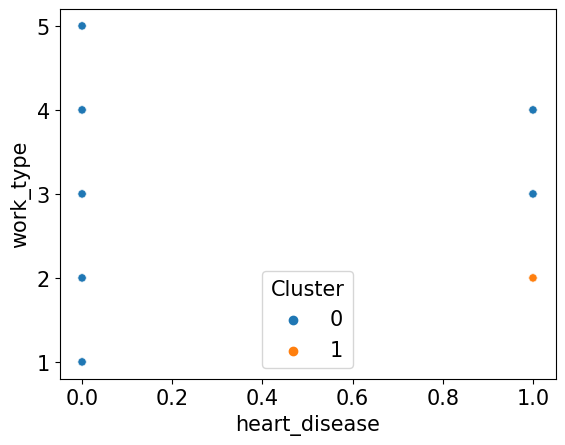

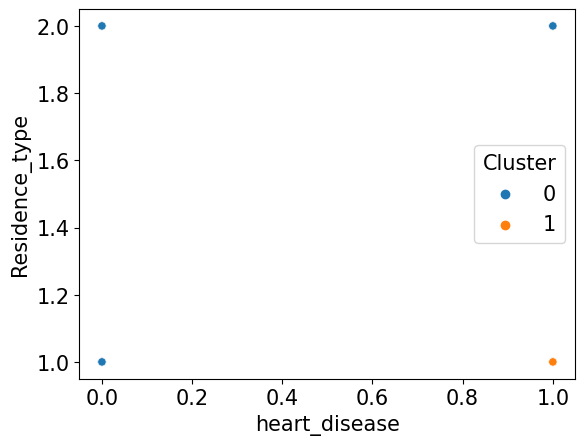

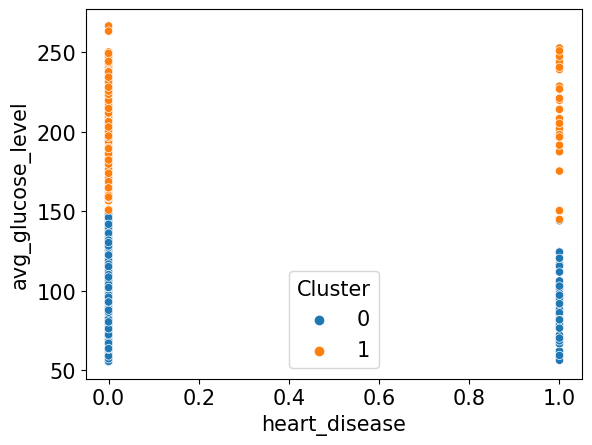

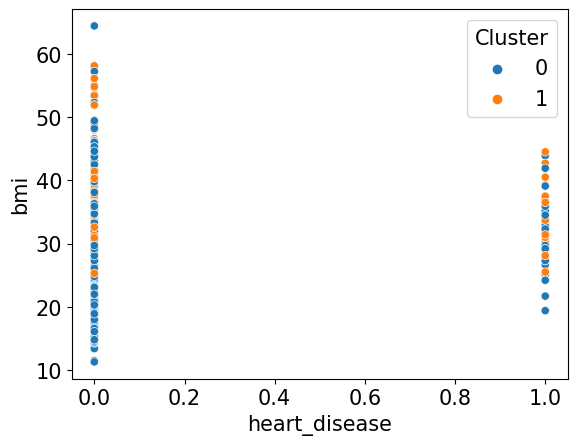

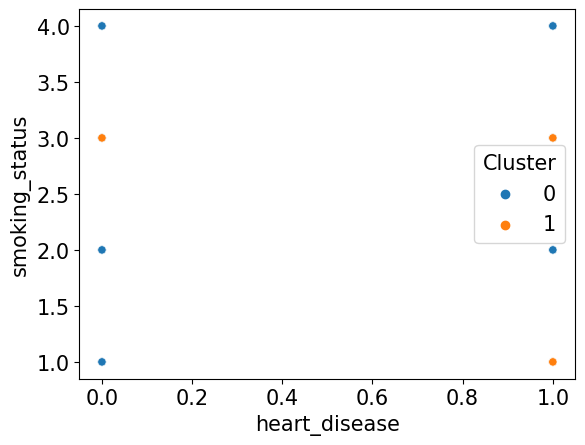

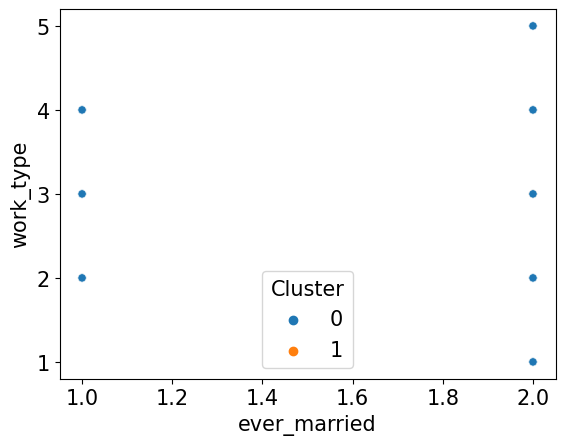

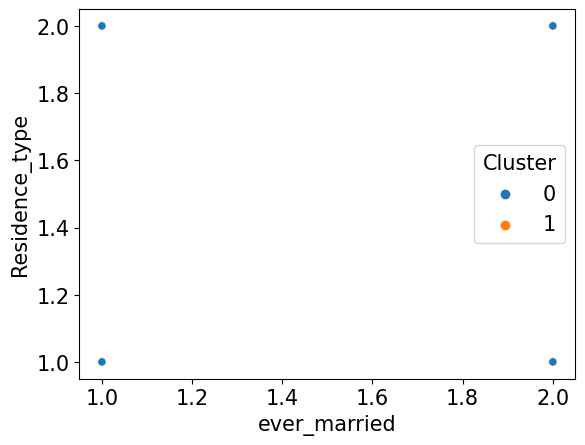

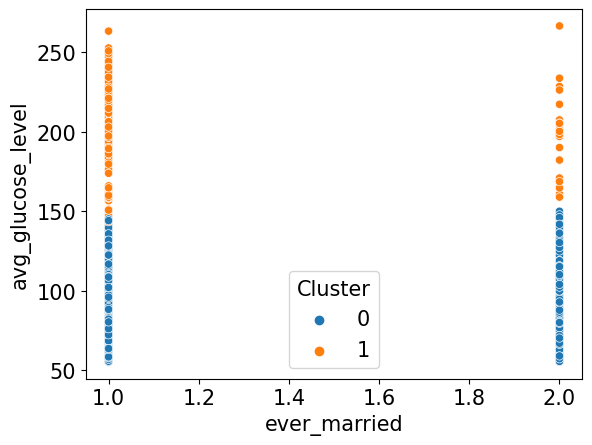

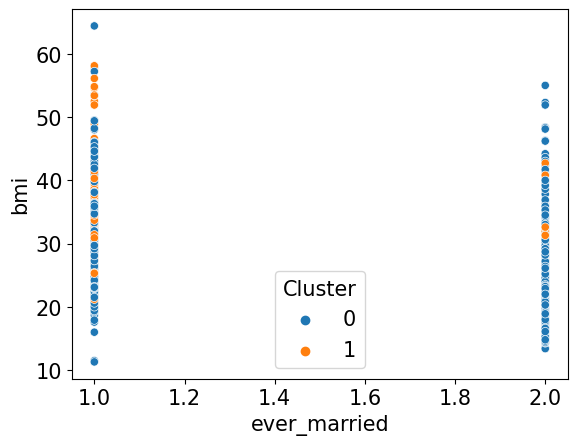

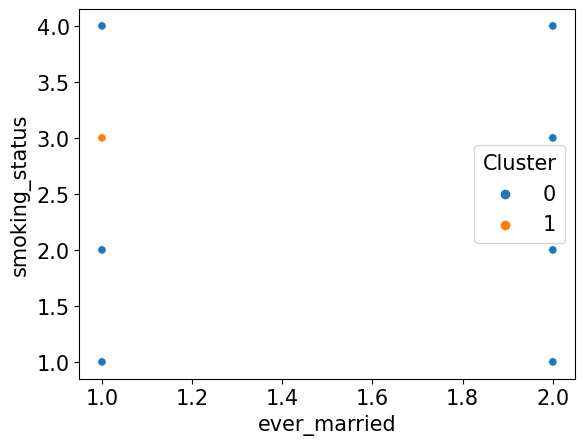

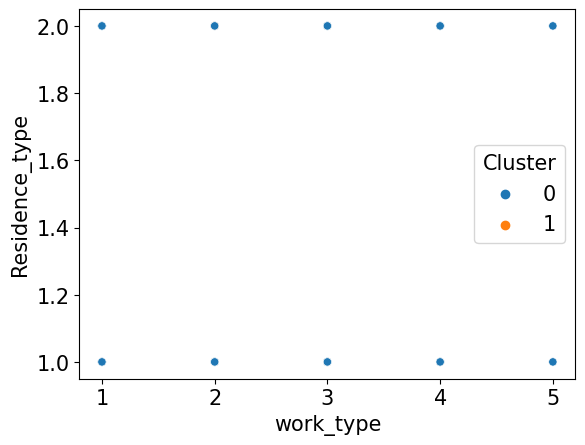

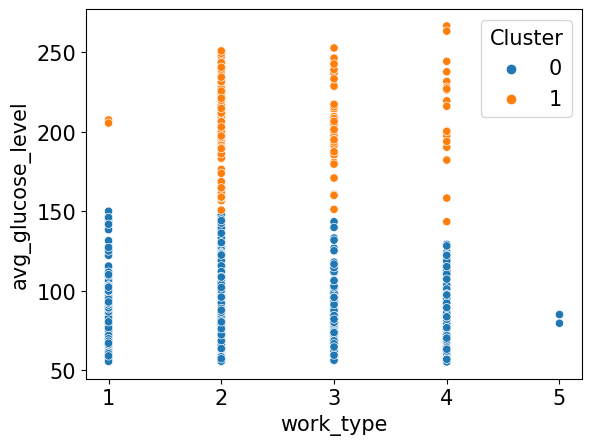

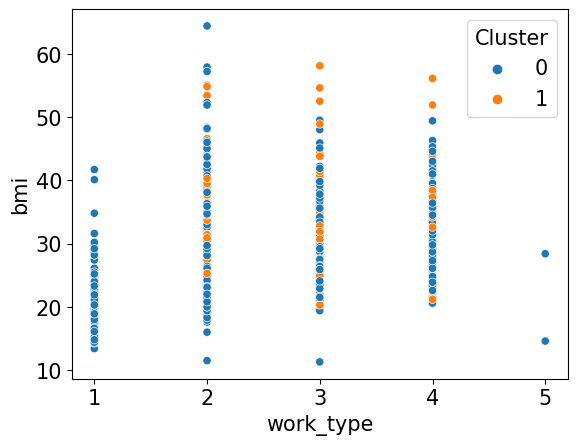

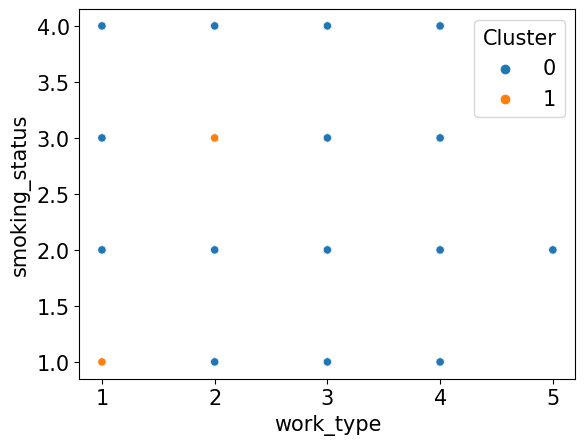

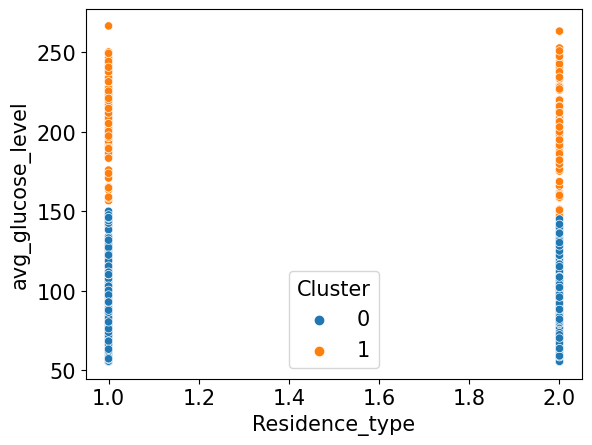

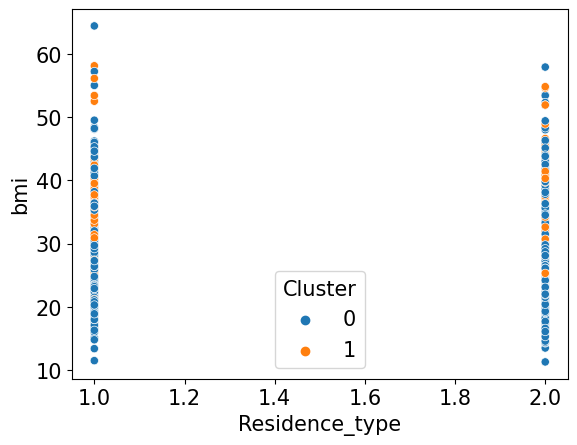

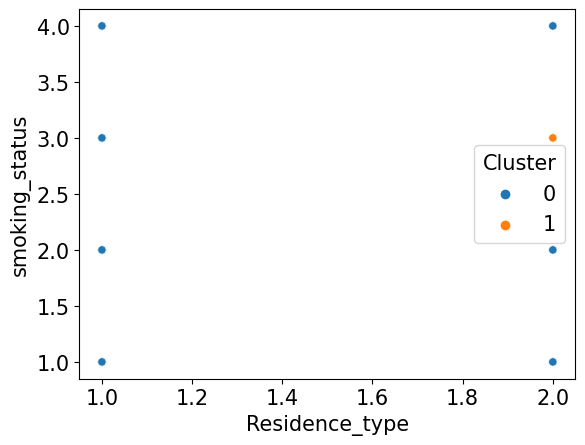

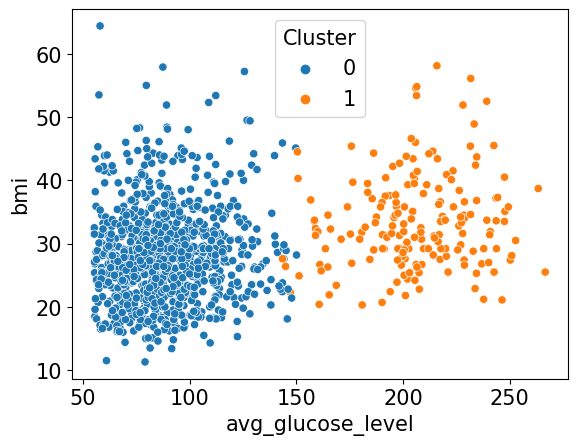

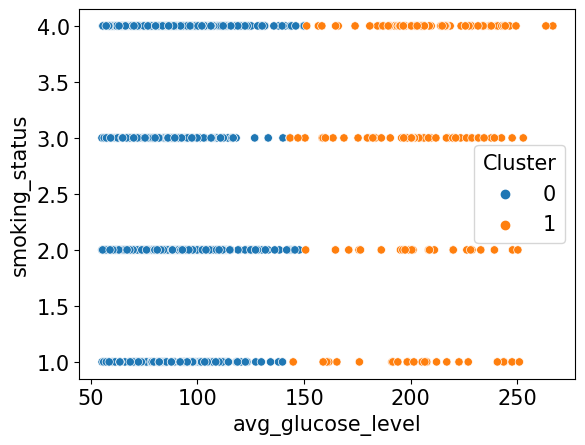

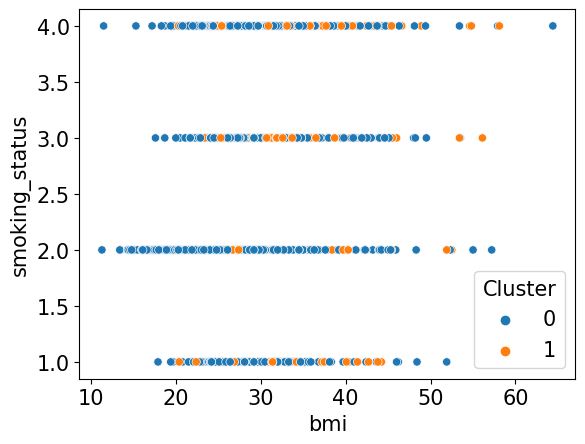

In [27]:
columns_to_plot = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']

for i in range(len(columns_to_plot)):
    for j in range(i+1, len(columns_to_plot)):
        sns.scatterplot(data=data, x=columns_to_plot[i], y=columns_to_plot[j], hue='Cluster')
        plt.show()

<Figure size 8000x8000 with 0 Axes>

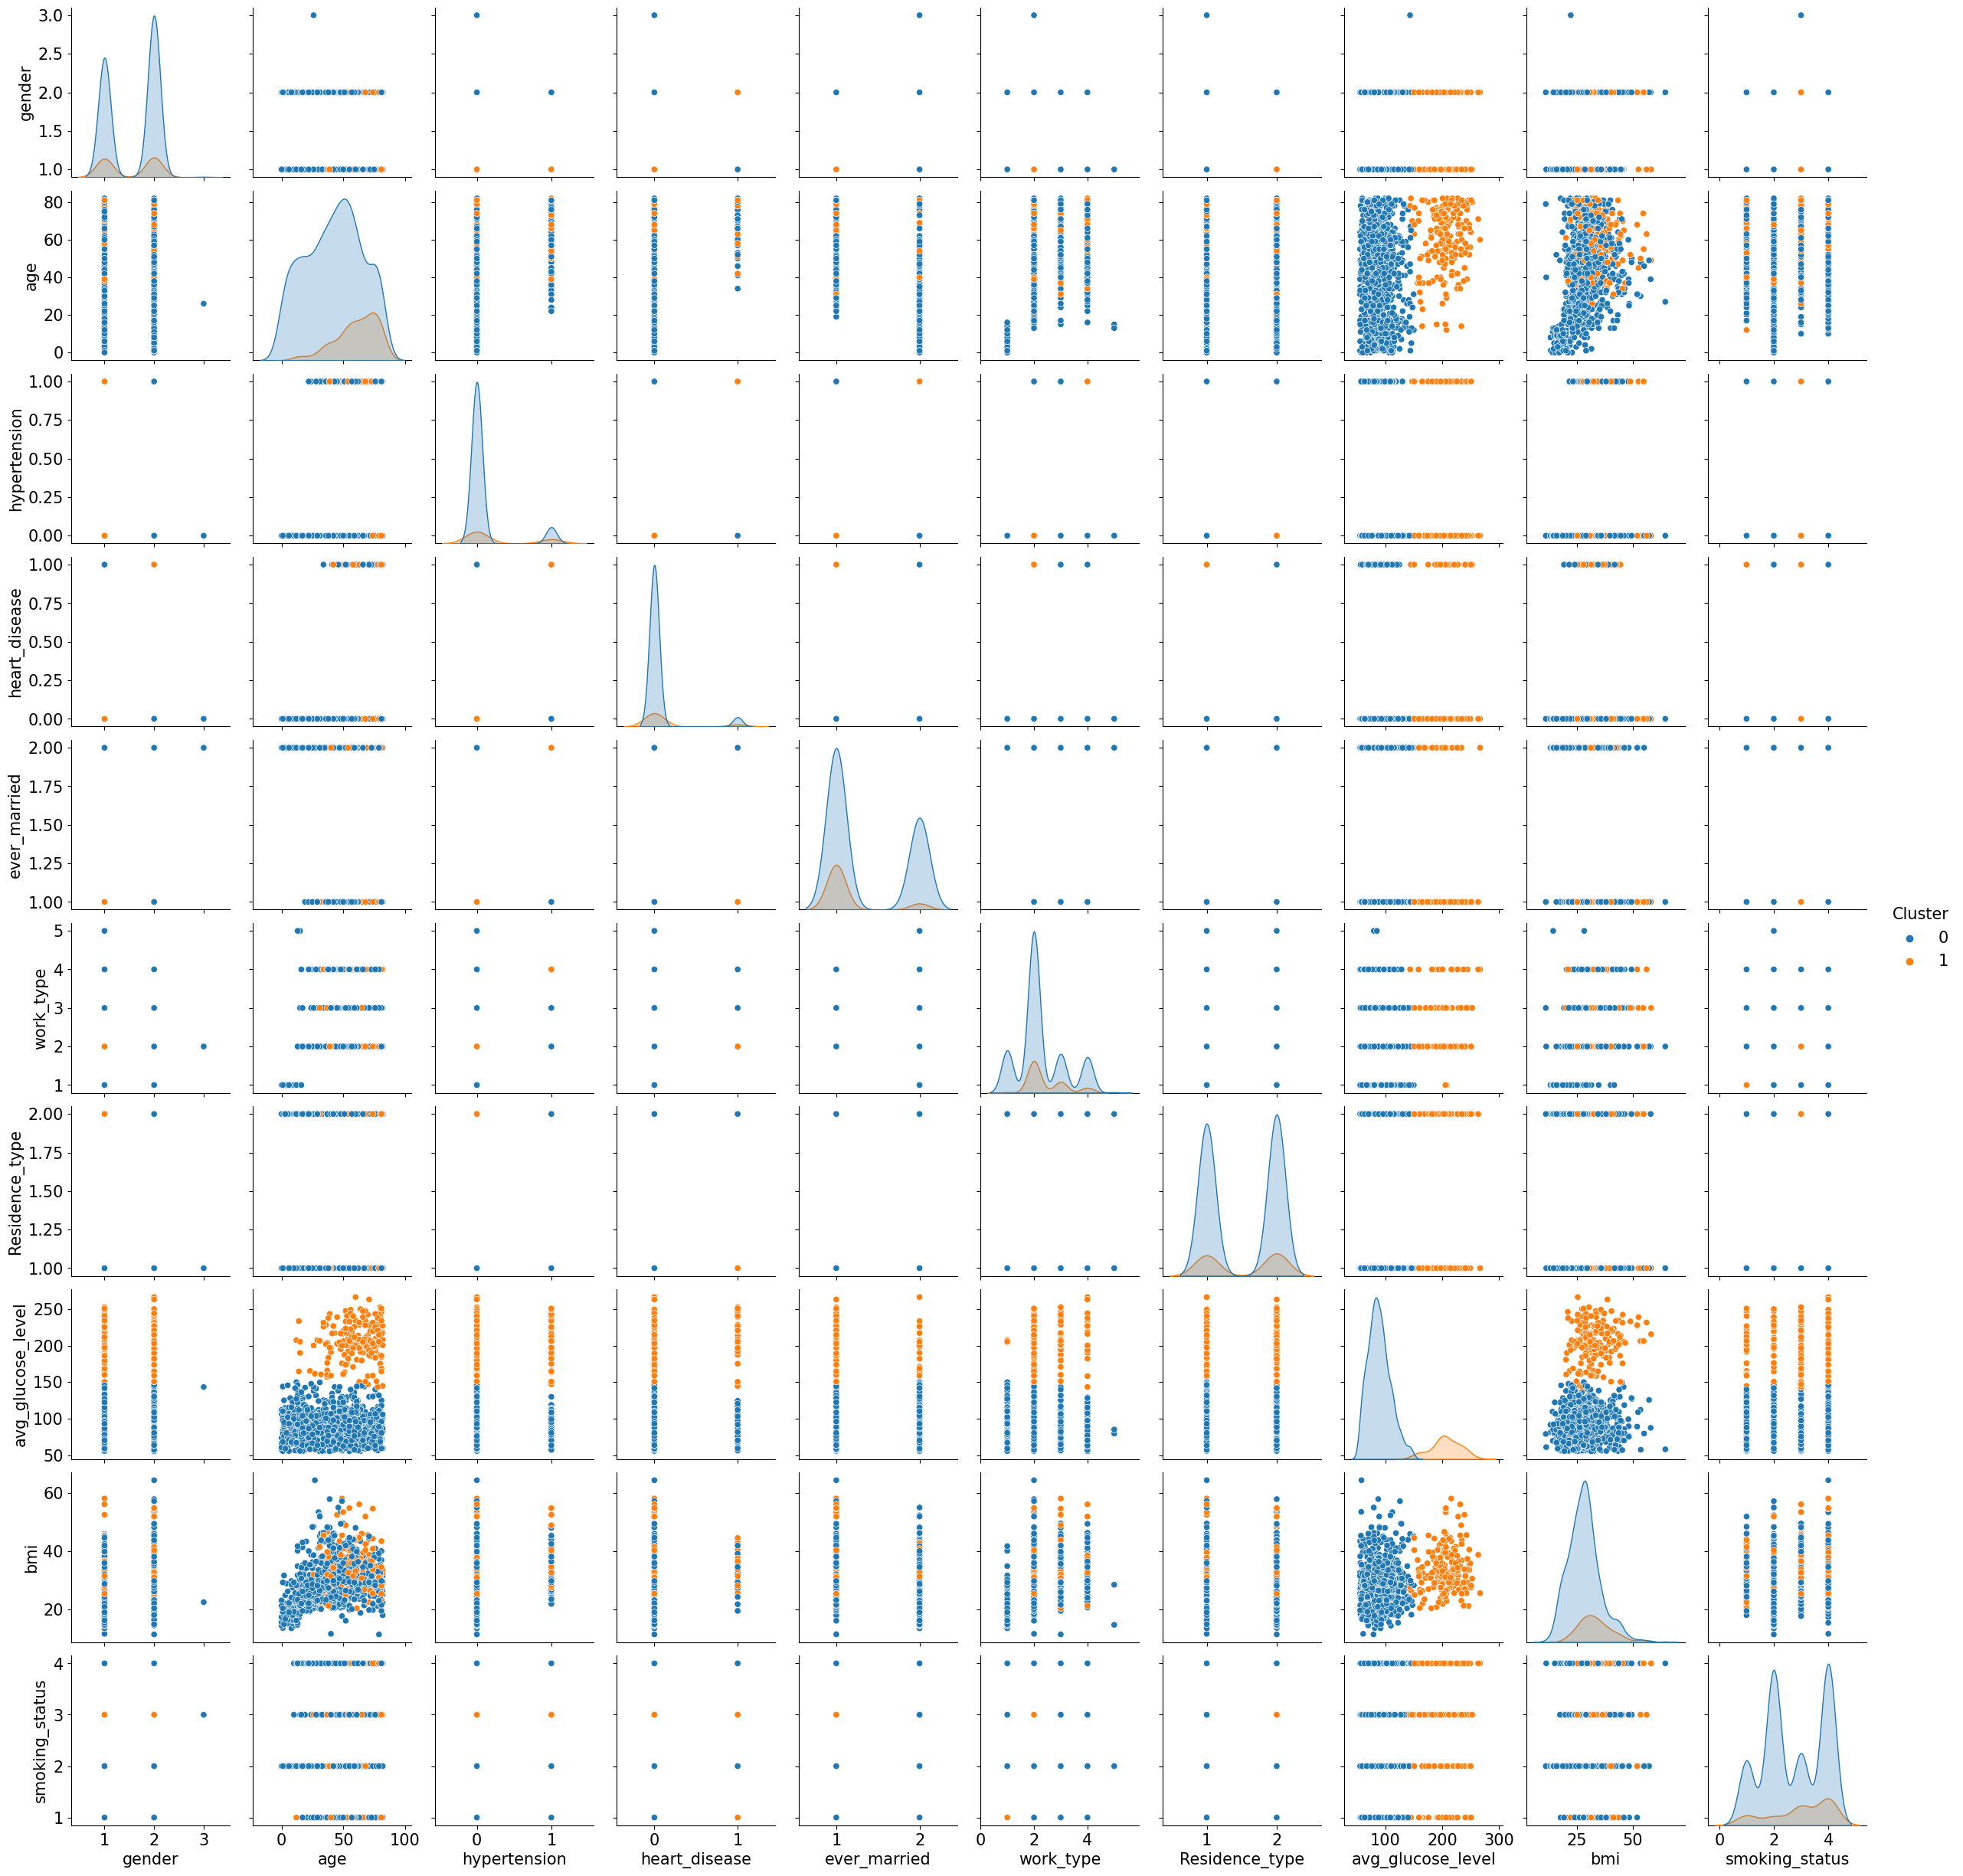

In [39]:
# Set the figure size
plt.figure(figsize=(80, 80))

plt.rcParams.update({'font.size': 15})
sns.pairplot(data, hue='Cluster')

# Show the plot
plt.show()

The distinct attributes of each cluster become evident when examining the relationships between the columns `avg_glucose_level`, `bmi`, and `age` with Pairplot. These relationships provide a clear characterization of the clusters.